In [3]:
# extract data set from zip file to folder Data set
import zipfile
import os

# Define the paths
zip_file_path_train = 'Dataset/train.csv.zip'
zip_file_path_test = 'Dataset/test.csv.zip'
destination_folder = 'Dataset/'  # Ensure this folder exists

# Extract the train dataset
with zipfile.ZipFile(zip_file_path_train, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Extract the test dataset
with zipfile.ZipFile(zip_file_path_test, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Files extracted successfully!")

Files extracted successfully!


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")


In [3]:
y_train = train['label']
x_train = train.drop(labels = ['label'], axis=1)
#normalize Data scale the pixel values  to the range [0,1]
x_train = x_train/255
x_test  = test/255


model = tf.keras.models.Sequential()


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Set a higher max_iter to ensure convergence

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9191666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.90      0.87      0.89       937
           4       0.92      0.93      0.93       839
           5       0.85      0.88      0.87       702
           6       0.93      0.96      0.94       785
           7       0.93      0.92      0.93       893
           8       0.90      0.89      0.89       835
           9       0.91      0.90      0.91       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



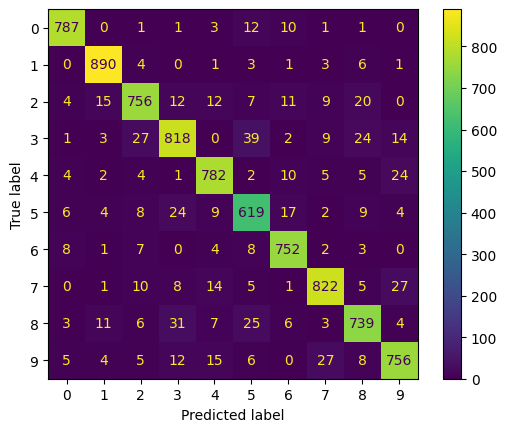

In [7]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)

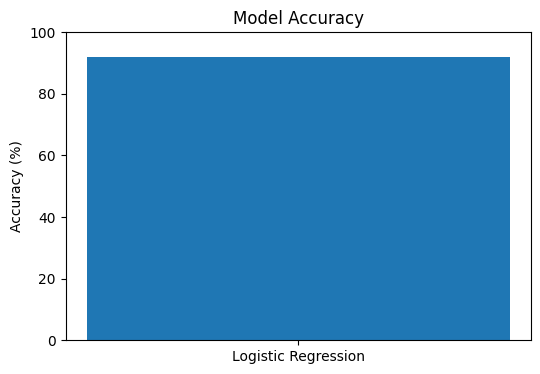

In [9]:
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy * 100])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

In [36]:
# Predict on the test data
test_predictions = model.predict(x_test)

# Print the first few predictions
print("Test Predictions:", test_predictions[:10])

Test Predictions: [2 0 9 7 3 7 0 3 0 3]


In [37]:
pd.DataFrame(test_predictions, columns=["Predicted"]).to_csv("test_predictions.csv", index=False)